In [2]:
#import necessary libraries
!pip install -q seaborn scikit-learn matplotlib pandas
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn. preprocessing as preprocessing

In [3]:
#read the data
df = pd.read_csv("/home/ltgwgeorge/Desktop/GeorgeCode/python/pythonGeorge/LearnMachineLearning/datasets/customer_data_records.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [4]:
# Select the relevant features
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [5]:
#Standardise the features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Use Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

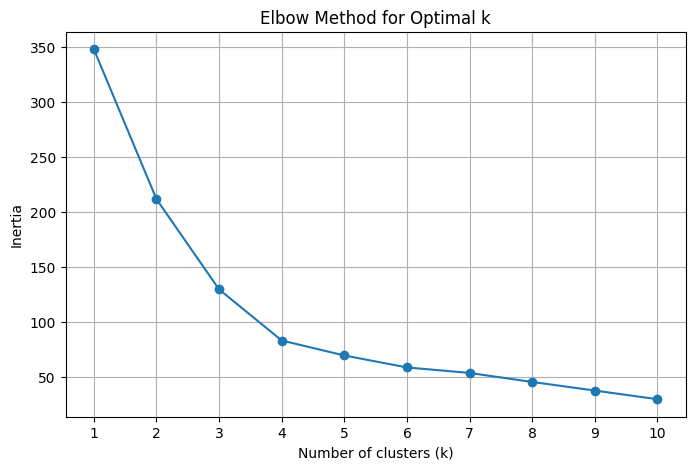

In [8]:
#Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [10]:
#Apply KMeans clustering with the optimal number of clusters
optimal_k = 5  # Based on the Elbow method
kmeans = cluster.KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
#Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.fit_predict(X_scaled)

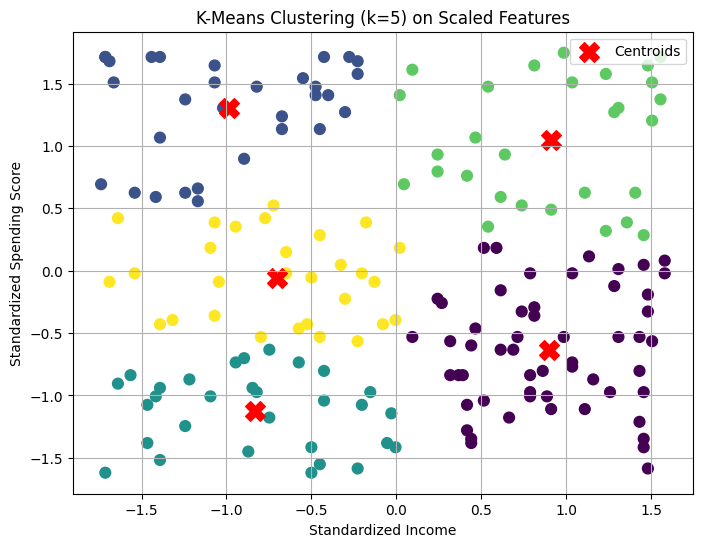

In [11]:
# Visualize the clusters using the scaled data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering (k={optimal_k}) on Scaled Features")
plt.xlabel("Standardized Income")
plt.ylabel("Standardized Spending Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#